In [1]:
from utils import *
from scipy.optimize import minimize_scalar, minimize
from tqdm import tqdm

In [2]:
x = normalize(np.array((2,2,2,2,2,2)).reshape(1,-1))
y = normalize(np.array((1,1,1,1,1,1)).reshape(1,-1))
NTK(depth=2, c=2, bias=10, bias_bounds='fixed')(x,y)
Matern(nu=0.5, length_scale=1)(x,y)

array([[1.]])

In [19]:
x = normalize(np.array((2,2,2,2,2,2)).reshape(1,-1))
y = normalize(np.array((0,0,0,0,0,0)).reshape(1,-1))
NTK(depth=2, c=2, bias=0, bias_bounds='fixed')(x,y)
Matern(nu=0.5, length_scale=1)(x,y)

array([[0.36787944]])

In [13]:
ntk = NTK(depth=3, c=2, bias=0.0)
lpk = Matern(nu=0.5)
x, y = normalize(np.random.randint(0,100000000, 3).reshape(1,-1)), normalize(np.random.randint(0,100000000, 3).reshape(1,-1))

ell = np.linalg.norm(x-y)/np.log(1/ntk(x,y)).squeeze()
lpk.length_scale = ell

print('ell    ', ell)
print(f'{x}, {y}')
print('ntk    ', ntk(x,y).squeeze())
print('lpk    ', lpk(x,y).squeeze())

x, y = normalize(np.random.randint(0,100000000, 3).reshape(1,-1)), normalize(np.random.randint(0,100000000, 3).reshape(1,-1))
ell = np.linalg.norm(x-y)/np.log(1/ntk(x,y)).squeeze()

print()
print('ell    ', ell)
print(f'{x}, {y}')
print('ntk new', ntk(x,y).squeeze())
print('lpk new', lpk(x,y).squeeze())


ell     1.475328855596736
[[0.86486604 0.26426629 0.42681385]], [[0.81756736 0.57550842 0.01933056]]
ntk     0.7053745645190552
lpk     0.7053745645190553

ell     1.2923326993413413
[[0.29503967 0.31305681 0.90274416]], [[0.88200679 0.31191775 0.35322986]]
ntk new 0.536778302077492
lpk new 0.579843136181775


In [ ]:
for depth in (3, 3):
    for bias in (0, 0, 0.1, 0.1, 2, 2, 25, 25, 100, 100):
        x = normalize(np.random.randint(0,100000000, 6).reshape(1,-1))
        y = normalize(np.random.randint(0,100000000, 6).reshape(1,-1))
        minimum = 100000000000
        ntk = NTK(depth=depth, c=2, bias=bias)
        lpk = Matern(nu=0.5)
        for l in tqdm(np.linspace(0.001, 5, 10000)):
            lpk.length_scale = l
            val = np.abs(ntk(x,y) - lpk(x,y)).squeeze()
            if val < minimum:
                minimum = val
                opt = l

        lpk.length_scale = opt
        print(f'~~~ DEPTH {depth} BIAS {bias} ~~~')
        print('ell_search :', opt)
        print('ell_truth  :', np.linalg.norm(x-y)/np.log(1/ntk(x,y)).squeeze())
        print('srch-tru   :', np.abs(opt-np.linalg.norm(x-y)/np.log(1/ntk(x,y)).squeeze()))
        print('ntk        :', ntk(x,y).squeeze())
        print('lpk        :', lpk(x,y).squeeze())
        print('ntk-lpk    :', minimum)

: 

In [2]:
def f(ell_b, ntk, lpk):
    np.random.seed(15874)
    lpk.length_scale = ell_b[0]
    ntk.bias = ell_b[1]

    vals = []
    for i in range(0,100):
        x = normalize(np.random.randint(0,100000000, 6).reshape(1,-1))
        y = normalize(np.random.randint(0,100000000, 6).reshape(1,-1))

        vals.append(np.abs((ntk(x,y) - lpk(x,y)).squeeze()))
        
    return np.sqrt(np.sum(np.array(vals)**2)/100)


In [3]:
ntk = NTK(depth=3, c=2)
lpk = Matern(nu=0.5)

opt_out = minimize(f, x0=[0.1,0.1], args=(ntk, lpk), tol=1e-7)

In [4]:
opt_out

      fun: 0.000737538832116348
 hess_inv: array([[ 1.69558445, -8.80578761],
       [-8.80578761, 47.14559567]])
      jac: array([6.47560228e-10, 1.45519152e-11])
  message: 'Optimization terminated successfully.'
     nfev: 96
      nit: 21
     njev: 32
   status: 0
  success: True
        x: array([ 2.02527968, -2.03746644])

In [26]:
lpk.length_scale, ntk.bias = opt_out.x

x = normalize(np.random.randint(0,100000000, 6).reshape(1,-1))
y = normalize(np.random.randint(0,100000000, 6).reshape(1,-1))

ntk(x,y).squeeze()-lpk(x,y).squeeze()

-0.0005881334709988417

In [25]:
def f(ell_b, ntk, lpk):
    np.random.seed(15874)
    ntk.bias = ell_b

    vals = []
    n=5
    for i in range(0,n):
        x2 = np.random.randint(0,100,100).reshape(1,-1)
        y2 = np.random.randint(0,100,100).reshape(1,-1)

        x2 = normalize(x2)
        y2 = normalize(y2)

        K = ntk(x2,y2)
        vals.append(- np.linalg.norm(x2-y2) / np.log(K))
    return np.var(vals)
    # for i in range(0,n):
    #     x = normalize(np.random.randint(0,100000000, 6).reshape(1,-1))
    #     y = normalize(np.random.randint(0,100000000, 6).reshape(1,-1))
    #     lpk.length_scale = np.linalg.norm(x-y)/np.log(1/ntk(x,y)).squeeze()
    #     x = normalize(np.random.randint(0,100000000, 6).reshape(1,-1))
    #     y = normalize(np.random.randint(0,100000000, 6).reshape(1,-1))
    #     vals.append(np.abs((ntk(x,y) - lpk(x,y)).squeeze()))
        
    # return np.sqrt(np.sum(np.array(vals)**2)/n)




In [427]:
ntk = ConstantKernel() + NTK(depth=100, c=2)
ntk.k2.

In [ ]:
ntk = NTK(depth=3, c=2)
lpk = Matern(nu=0.5)

opt_out = minimize(f, x0=9, args=(ntk, lpk), tol=1e-7)
opt_out

In [32]:
x = normalize(np.random.randint(0,100000000, 6).reshape(1,-1))
y = normalize(np.random.randint(0,100000000, 6).reshape(1,-1))

ntk.bias = opt_out.x
lpk.length_scale = np.linalg.norm(x-y)/np.log(1/ntk(x,y)).squeeze()

In [39]:
x = normalize(np.array([0.8027, 0.2299, 0.5503]).reshape(1,-1))
y = normalize(np.array([0.7982, 0.3818, 0.4658]).reshape(1,-1))
print(ntk(x,y).squeeze() - lpk(x,y).squeeze())

0.0007264685853629604


In [40]:
x = normalize(np.array([0.0389, 0.9663, 0.2545]).reshape(1,-1))
y = normalize(np.array([0.6941, 0.5958, 0.4040]).reshape(1,-1))
print(ntk(x,y).squeeze() - lpk(x,y).squeeze())

-0.0016642430631274019


In [38]:
x = normalize(np.random.randint(0,100000000, 6).reshape(1,-1))
y = normalize(np.random.randint(0,100000000, 6).reshape(1,-1))

print(lpk.length_scale)
print(ntk(x,y).squeeze() - lpk(x,y).squeeze())

2.0512443887420524
0.0005887858147411995


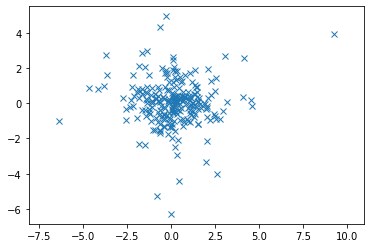

In [51]:
mean = [10, 0]

cov = [[5, 0], [0, 12]]

x, y = np.random.laplace(size = (250,2)).T
    
# mean, cov, 5000).T

plt.plot(x, y, 'x')

plt.axis('equal')

plt.show()

(5000, 2)

(250, 3) (250, 3)


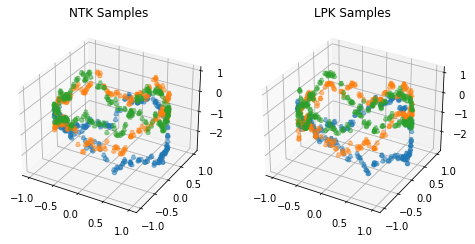

In [62]:
arrsize=20
tmp = np.linspace(0, 7, arrsize, dtype=np.float16)
X, Y = np.meshgrid(tmp, tmp)
bigX = np.stack((X, Y), axis=2).reshape(-1,2)

bigX = np.random.laplace(size = (250,2))
# np.random.multivariate_normal(mean, cov, 250)
bigX_norm = normalize(bigX, axis=1)
# bigX_norm = bigX

nsamples = 3

gp_ntk_sample = GPR(kernel=ntk, alpha=1e-9, normalize_y=True, n_restarts_optimizer=0, random_state=3480795)
# mean_ntk_sample = gp_ntk_sample.predict(bigX_norm)
samples_ntk = gp_ntk_sample.sample_y(bigX_norm, nsamples)

gp_lpk_sample = GPR(kernel=lpk, alpha=1e-9, normalize_y=True, n_restarts_optimizer=0, random_state=3480795)
# mean_lpk_sample = gp_lpk_sample.predict(bigX_norm)
samples_lpk = gp_lpk_sample.sample_y(bigX_norm, nsamples)
# samples_lpk = np.squeeze(samples_lpk)

print(samples_lpk.shape, samples_ntk.shape)

nrows=1
ncols=2
fig, axes = plt.subplots(nrows, ncols, figsize=(8, 4))
for i in range(0, len(axes)):
    axes[i].remove()
    axes[i] = plt.subplot(nrows, ncols, i+1, projection='3d')
    axes[i].patch.set_alpha(0)
    if i == 0 : plt.title('NTK Samples')
    if i == 1 : plt.title('LPK Samples')

for i, prior in enumerate(samples_ntk.T):
    axes[0].scatter(bigX_norm[:,0], bigX_norm[:,1], prior, linestyle="--", alpha=0.5, label=f"Sampled function #{i + 1}")

for i, prior in enumerate(samples_lpk.T):
    axes[1].scatter(bigX_norm[:,0], bigX_norm[:,1], prior, linestyle="--", alpha=0.5, label=f"Sampled function #{i + 1}")

In [ ]:
np.linalg.norm(x-y)/np.log(1/ntk(x,y))

In [ ]:
x = normalize(np.array((2,2,2,2,2,2)).reshape(1,-1))
y = normalize(np.array((1,1,1,1,1,1)).reshape(1,-1))
# y = np.array((0,0,0,0,0,0,0)).reshape(1,-1)
# cdist(x, y, 'euclidean')
# dep = range(1, 100)

# lengthscale = []
# for depth in dep:
#     ntk_val = NTK(depth=depth, c=2, bias=0, bias_bounds='fixed')(x,y)
#     c = np.linalg.norm(x-y)/np.log(1/ntk_val)
#     lengthscale.append(c[0,0])

# plt.scatter(dep, lengthscale)


In [ ]:
x = np.array((2,2,2,2,2,2)).reshape(1,-1)
# y = np.array((1,1,1,1,1,1)).reshape(1,-1)
y = np.array((0,0,0,0,0,0)).reshape(1,-1)
# cdist(x, y, 'euclidean')
dep = range(1, 100)

lengthscale = []
for depth in dep:
    ntk_val = NTK(depth=depth, c=2, bias=0, bias_bounds='fixed')(x,y)
    c = np.linalg.norm(x-y)/np.log(1/ntk_val)
    lengthscale.append(c[0,0])

plt.scatter(dep, lengthscale)

$$
    e^{-\frac{\|x-y\|}{c}} = U_{NTK}\\
    -\frac{\|x-y\|}{c} = \log(U_{NTK})\\
    \frac{\|x-y\|}{c} = -\log(U_{NTK})\\
    \frac{1}{c} = \frac{\log(U_{NTK}^{-1})}{\|x-y\|} \\
    c = \frac{\|x-y\|}{\log\left(\frac{1}{U_{NTK}}\right)}
$$

$$
        e^{-c\sqrt{2(1-x^Ty)}} = U_{NTK}\\
        -c\sqrt{2(1-x^Ty)} = \log(U_{NTK})\\
        c\sqrt{2(1-x^Ty)} = -\log(U_{NTK})\\
        c = \frac{-\log(U_{NTK})}{\sqrt{2(1-x^Ty)}}
$$

In [27]:
x1 = normalize(np.array([1,2,3]).reshape(1,-1))
y1 = normalize(np.array([4,5,6]).reshape(1,-1))
x2 = normalize(np.array([7,8,9]).reshape(1,-1))
y2 = normalize(np.array([10,11,12]).reshape(1,-1))

ntk = NTK(
    depth=100, 
    c=2, 
    bias=0, 
    bias_bounds='fixed'
)

ntk_val_1 = ntk(x1,x1)
ntk_val_2 = ntk(x2,x2)

print(ntk_val_1, ntk_val_2)

c1 = np.linalg.norm(x1-x1)/-np.log(ntk_val_1)
c2 = np.linalg.norm(x2-x2)/-np.log(ntk_val_2)

# c1 = -np.log(ntk_val_1)/np.sqrt(2*(1 - (x1 @ x1.T)))
# c2 = -np.log(ntk_val_2)/np.sqrt(2*(1 - (x2 @ x2.T)))

print(c1)
print(c2)

[[1.]] [[1.]]
[[nan]]
[[nan]]


/tmp/ipykernel_19129/2572052158.py:18: RuntimeWarning: invalid value encountered in true_divide
  c1 = np.linalg.norm(x1-x1)/-np.log(ntk_val_1)
/tmp/ipykernel_19129/2572052158.py:19: RuntimeWarning: invalid value encountered in true_divide
  c2 = np.linalg.norm(x2-x2)/-np.log(ntk_val_2)


In [28]:
x1-x1

array([[0., 0., 0.]])

In [ ]:
np.diff()

In [ ]:
# Find lengthscale and bias to match depth
D = range(1, 2)

dim = 3
x1,y1 = normalize(np.random.randint(0, 100, dim).reshape(1,-1)), normalize(np.random.randint(0, 100, dim).reshape(1,-1))
x2,y2 = normalize(np.random.randint(0, 100, dim).reshape(1,-1)), normalize(np.random.randint(0, 100, dim).reshape(1,-1))

def B(bias, D, point1, point2):
    K = NTK(D,bias)
    l1 = -np.linalg.norm(x1-y1) / np.log(K(x1,y1).squeeze())
    l2 = -np.linalg.norm(x2-y2) / np.log(K(x2,y2).squeeze())
    lengthscales = np.array([l1,l2])
    return np.var(lengthscales)


lengthscales = []
for depth in D:
    bias_min = minimize_scalar(B, args=(depth), method='bounded', bounds=(0, 10), options={'maxiter': 10000})
    print(bias_min)

    # # get lengthscale
    # K = NTK(depth,bias_min.x)
    # x,y = normalize(np.random.randint(0, 100, 5).reshape(1,-1)), normalize(np.random.randint(0, 100, 5).reshape(1,-1))
    # lengthscales.append(-np.linalg.norm(x-y) / np.log(K(x,y).squeeze()))

In [ ]:
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.random.html
rng = np.random.default_rng()
# seed 235689047
# [0, 5)

n_tests = 10
vector_size = 6
dep = range(1, 100)
fig, ax = plt.subplots(nrows=n_tests, ncols=2, figsize=(8, n_tests*2), sharex=True)
fig.suptitle(r"$\mathbb{R}^6$ vs. $\mathbb{S}^5$")

for test_num in range(0, n_tests):
    x = (10 - (0)) * rng.random((vector_size,)) + (0)
    y = (10 - (0)) * rng.random((vector_size,)) + (0)
    xn = normalize(x.reshape(1,-1))[0]
    yn = normalize(y.reshape(1,-1))[0]
    x=x.reshape(-1,1)
    y=y.reshape(-1,1)
    xn=xn.reshape(-1,1)
    yn=yn.reshape(-1,1)

    lengthscale = []
    lengthscale_n = []
    for depth in dep:
        ntk_val = NTK(
            depth=depth, 
            c=2, 
            bias=0, 
            bias_bounds='fixed'
        )(x,y)
        ntk_val_n = NTK(
            depth=depth, 
            c=2, 
            bias=0, 
            bias_bounds='fixed'
        )(xn,yn)
        c = np.linalg.norm(x-y)/np.log(1/ntk_val)
        cn = np.linalg.norm(xn-yn)/np.log(1/ntk_val_n)
        lengthscale.append(c[0,0])
        lengthscale_n.append(cn[0,0])

    ax[test_num][0].scatter(dep, lengthscale)
    ax[test_num][0].set_title(f'x={x.reshape(-1).round(2)}\ny={y.reshape(-1).round(2)}')
    ax[test_num][1].scatter(dep, lengthscale_n)
    ax[test_num][1].set_title(f'xn={xn.reshape(-1).round(2)}\nyn={yn.reshape(-1).round(2)}')
fig.tight_layout()

